In [1]:
%cd /content/drive/MyDrive/Data Mining/5. Dimension Reduction

/content/drive/MyDrive/Data Mining/5. Dimension Reduction


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [4]:
#data
dataset = pd.read_csv('abalone-challenge.csv')
dataset.head()

,Sex,Lenght,Diameter,Height,Whole weight,Shucked Weight,Viscera Weight,Shell Weight,Rings (+1.5=Years)
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [8]:
#transform strings into dummy
dataset = pd.get_dummies(dataset, drop_first = True)
dataset.head()

,Lenght,Diameter,Height,Whole weight,Shucked Weight,Viscera Weight,Shell Weight,Rings (+1.5=Years),Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,False,True
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,False,True
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,False,False
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,False,True
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,True,False


In [9]:
#Isolate X
X = dataset.drop(columns= 'Rings (+1.5=Years)')
X.head()

,Lenght,Diameter,Height,Whole weight,Shucked Weight,Viscera Weight,Shell Weight,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,False,True
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,False,True
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,False,False
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,False,True
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,True,False


<Axes: >

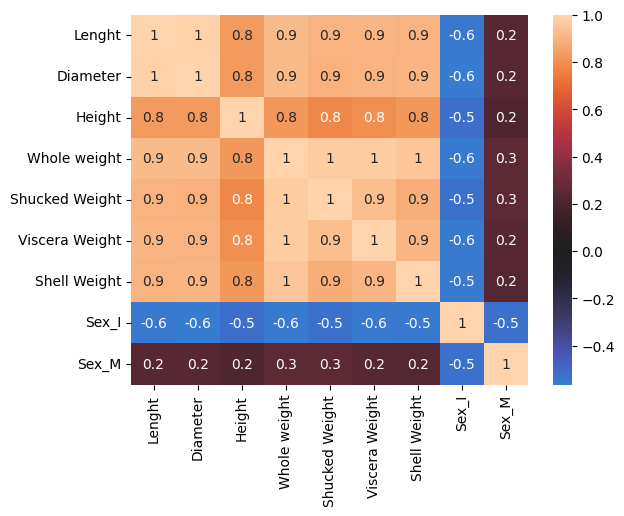

In [10]:
#Correlation Matrix
import seaborn as sns
corr = X.corr()
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, annot = True, fmt=".1g",center=0)

In [11]:
#Standardize Data

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)
X_scaled.head()

,Lenght,Diameter,Height,Whole weight,Shucked Weight,Viscera Weight,Shell Weight,Sex_I,Sex_M
0,0.513514,0.521008,0.084071,0.181335,0.150303,0.132324,0.147982,0.0,1.0
1,0.371622,0.352941,0.079646,0.079157,0.066241,0.063199,0.068261,0.0,1.0
2,0.614865,0.613445,0.119469,0.239065,0.171822,0.185648,0.207773,0.0,0.0
3,0.493243,0.521008,0.110619,0.182044,0.144250,0.149440,0.152965,0.0,1.0
4,0.344595,0.336134,0.070796,0.071897,0.059516,0.051350,0.053313,1.0,0.0


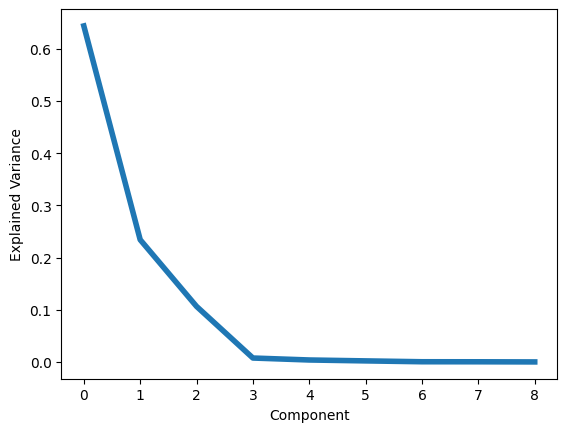

In [17]:
#Principal Component Analysis

model = PCA(random_state=1502).fit(X_scaled)
plt.plot(model.explained_variance_ratio_, linewidth=4)
plt.xlabel('Component')
plt.ylabel('Explained Variance')
plt.show()

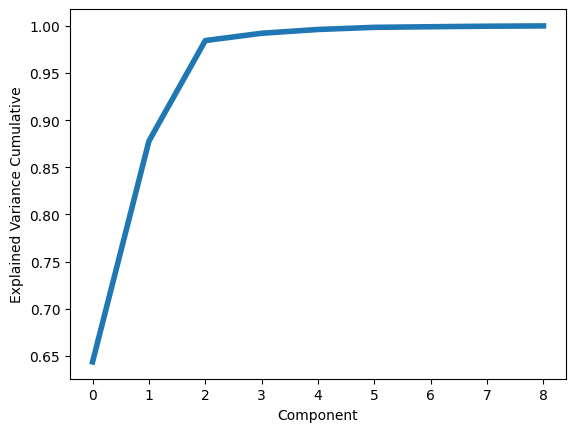

In [18]:
#cumulative
plt.plot(np.cumsum(model.explained_variance_ratio_), linewidth=4)
plt.xlabel('Component')
plt.ylabel('Explained Variance Cumulative')
plt.show()

In [20]:
#PCA

model = PCA(n_components=3, random_state=1502).fit(X_scaled)

In [21]:
model_interpretation = pd.DataFrame(model.components_, columns = X.columns)
model_interpretation

,Lenght,Diameter,Height,Whole weight,Shucked Weight,Viscera Weight,Shell Weight,Sex_I,Sex_M
0,0.162097,0.168853,0.033600,0.177639,0.146710,0.145040,0.137066,-0.673094,0.630973
1,0.254843,0.262763,0.051207,0.271986,0.221049,0.223921,0.213838,-0.340180,-0.727296
2,0.294654,0.293744,0.052035,0.329658,0.292162,0.257841,0.245421,0.656281,0.269694


In [22]:
#components
components = model.transform(X_scaled)
components = pd.DataFrame(components, columns = ['male',
                                                 'female',
                                                 'infants'])
components.head()

,male,female,infants
0,0.527362,-0.489425,-0.202499
1,0.424398,-0.648872,-0.389539
2,-0.041043,0.334986,-0.359593
3,0.527372,-0.489478,-0.202989
4,-0.893228,-0.282824,-0.027395


In [23]:
#merge dataset
final_dataset = pd.concat([dataset, components], axis = 1)
final_dataset.head()

,Lenght,Diameter,Height,Whole weight,Shucked Weight,Viscera Weight,Shell Weight,Rings (+1.5=Years),Sex_I,Sex_M,male,female,infants
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,False,True,0.527362,-0.489425,-0.202499
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,False,True,0.424398,-0.648872,-0.389539
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,False,False,-0.041043,0.334986,-0.359593
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,False,True,0.527372,-0.489478,-0.202989
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,True,False,-0.893228,-0.282824,-0.027395


In [24]:
#Manifold Learning
#t-sne

from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=1502)
components = model.fit_transform(X)
components = pd.DataFrame(components, columns = ['x', 'y'])
components.head()

,x,y
0,-5.672634,-61.764721
1,-28.164068,-53.772808
2,5.705063,-13.433778
3,-5.543610,-60.804054
4,-44.773033,-20.308399


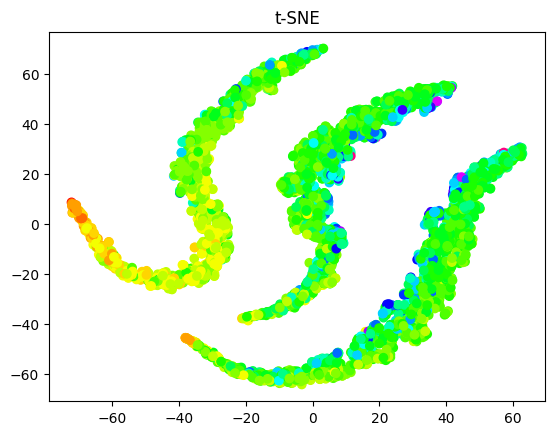

In [26]:
plt.scatter(components['x'], components['y'],cmap = 'hsv', c = dataset['Rings (+1.5=Years)'])
plt.title('t-SNE')
plt.show()
